In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
import cv2

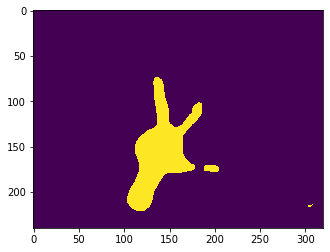

In [10]:
bin_img = cv2.imread('otherhand3.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(bin_img)

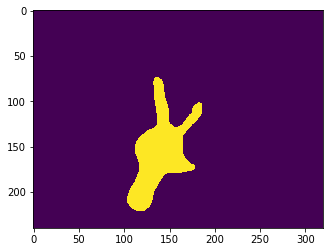

In [11]:
_, lab_im = cv2.connectedComponents(bin_img)
plt.imshow(lab_im)

# find areas and subtract it
max_area = -1
max_label = -1
for label in range(1, np.max(np.unique(lab_im))):
#     rows, cols = np.where(labeled_image == label)
    area = np.sum((lab_im == label).astype('uint8'))
    if area > max_area:
        max_area = area
        max_label = label
bin_img = (lab_im == max_label).astype('uint8') * 255
plt.imshow(bin_img)

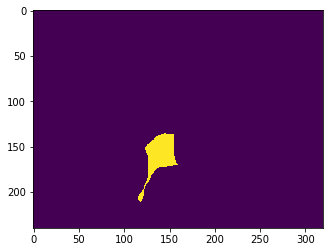

In [12]:
kernel = np.ones((15,20), dtype = 'uint8')
# image_dilate = cv2.dilate(bin_img, kernel)  
image_erode = cv2.erode(bin_img, kernel)  
plt.imshow(image_erode)

In [13]:
25//2

12

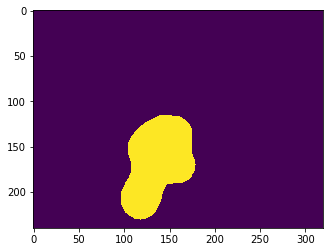

In [14]:
kernel = np.ones((25,25), dtype = 'uint8')
image_blur = gaussian_filter(image_erode, 3)
kernel = np.zeros((40, 40, 3), dtype='uint8')
kernel = cv2.circle(kernel, (20, 20), 20, (255, 255, 255), -1)
image_dilate = cv2.dilate(image_erode, kernel[:,:,1])  
# image_erode = cv2.erode(bin_img, kernel)  
plt.imshow(image_dilate)

[  0 255]


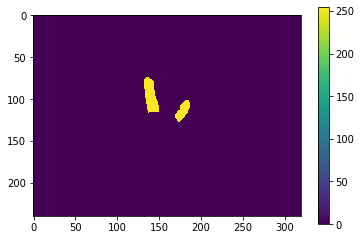

In [15]:
# plt.imshow(bin_img - image_dilate)
fingies = bin_img - image_dilate
fingies[fingies != 255] = 0
plt.imshow(fingies)
plt.colorbar()
print(np.unique(fingies))

number of fingers is  2


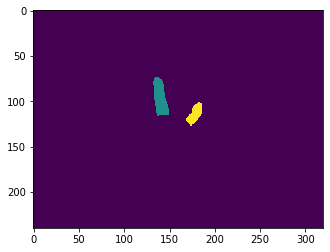

In [16]:
_, lab_im = cv2.connectedComponents(fingies)     
plt.imshow(lab_im)
np.unique(lab_im)
print('number of fingers is ',  np.max(lab_im))